# ASSIGNMENT 3

## QUESTION 1

<!-- Dataset : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database -->

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fast_ml

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install keras-tuner

In [4]:
'''Import all necessary packages'''

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


%matplotlib inline

In [5]:
# Check your directory path
%pwd

'C:\\Users\\aishw'

In [6]:
path = 'C:/Users/aishw'
# diabetes_prima_India_dataset_test

In [7]:
# List all files if necessary and locate your file
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
# trn_df = pd.read_csv(f'{path}/diabetes_prima_India_dataset_train.csv')
# test_df = pd.read_csv(f'{path}/diabetes_prima_India_dataset_test.csv')

df = pd.read_csv(f'{path}/diabetes_prima_India_dataset_full.csv')

print (df)
# print(trn_df.shape)
# print(test_df.shape)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#  Pre-process the data by scaling

In [10]:
df["Pregnancies"] = df["Pregnancies"] + 0.001
df["Glucose"] = df["Glucose"] + 0.1
df["BloodPressure"] = df["BloodPressure"] + 0.01
df["SkinThickness"] = df["SkinThickness"] + 0.01
df["Insulin"] = df["Insulin"] + 0.001
df["BMI"] = df["BMI"] + 0.01
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"] + 0.0001
df["Age"] = df["Age"] + 0.01
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.001,148.1,72.01,35.01,0.001,33.61,0.6271,50.01,1
1,1.001,85.1,66.01,29.01,0.001,26.61,0.3511,31.01,0
2,8.001,183.1,64.01,0.01,0.001,23.31,0.6721,32.01,1
3,1.001,89.1,66.01,23.01,94.001,28.11,0.1671,21.01,0
4,0.001,137.1,40.01,35.01,168.001,43.11,2.2881,33.01,1


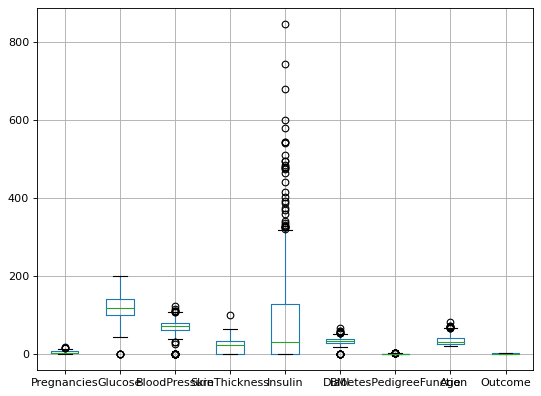

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

boxplot = df.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [12]:
data = df.drop(df.columns[[8]], axis=1)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.001,148.1,72.01,35.01,0.001,33.61,0.6271,50.01
1,1.001,85.1,66.01,29.01,0.001,26.61,0.3511,31.01
2,8.001,183.1,64.01,0.01,0.001,23.31,0.6721,32.01
3,1.001,89.1,66.01,23.01,94.001,28.11,0.1671,21.01
4,0.001,137.1,40.01,35.01,168.001,43.11,2.2881,33.01


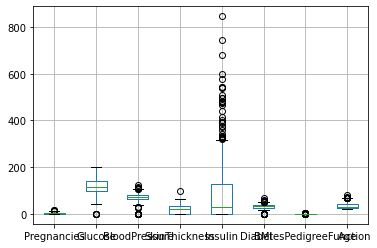

In [13]:
boxplot = data.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

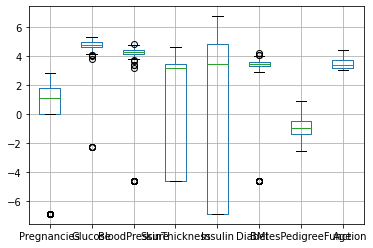

In [14]:
data['Pregnancies'] = np.log(data['Pregnancies'])
data['Glucose'] = np.log(data['Glucose'])
data['BloodPressure'] = np.log(data['BloodPressure'])
data['SkinThickness'] = np.log(data['SkinThickness'])
data['Insulin'] = np.log(data['Insulin'])
data['BMI'] = np.log(data['BMI'])
data['DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction'])
data['Age'] = np.log(data['Age'])
boxplot = data.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [15]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns= [
  'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.593453,0.439108,0.222777,0.714806,-1.022669,0.175837,0.765829,1.436394
1,-0.013549,-0.452901,0.175968,0.662921,-1.022669,-0.062245,-0.135252,-0.045987
2,0.690944,0.780651,0.159414,-1.537515,-1.022669,-0.197227,0.873488,0.052459
3,-0.013549,-0.378953,0.175968,0.598970,0.925712,-0.006339,-1.288688,-1.253544
4,-2.355149,0.314857,-0.093417,0.714806,1.024511,0.429614,2.776627,0.147876


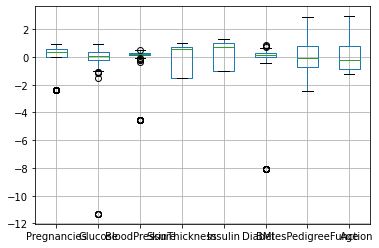

In [16]:
boxplot = df_scaled.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Split the dataset

In [17]:
#Separate out X and Y

X = df.iloc[:, :8]          
Y = df.iloc[:, 8:9]

In [18]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

(614, 8) (614, 1)
(77, 8) (77, 1)
(77, 8) (77, 1)


# Build and combine Deep Learning Model

In [19]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Fit the DNN with your train data

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=5)

Epoch 1/100
123/123 [==============================] - 1s 5ms/step - loss: 1.1892 - accuracy: 0.5049 - val_loss: 0.8100 - val_accuracy: 0.4935
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.5407 - val_loss: 0.7504 - val_accuracy: 0.4935
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.6124 - val_loss: 0.7234 - val_accuracy: 0.6623
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6303 - val_loss: 0.7122 - val_accuracy: 0.6753
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6450 - val_loss: 0.6960 - val_accuracy: 0.5455
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6368 - val_loss: 0.6175 - val_accuracy: 0.6883
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6433 - val_loss: 0.6166 - val_accuracy: 0.6883

In [22]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7403
Accuracy: 74.03%


# Hypertuning Model 

In [23]:
def model_fun():
    model1= Sequential()
    model1.add(Dense(10,input_dim=8,kernel_initializer ='uniform', activation = 'relu'))
    model1.add(Dense(6,kernel_initializer ='uniform', activation = 'relu'))
    model1.add(Dense(1,kernel_initializer ='uniform', activation = 'sigmoid'))
    model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model1

In [24]:
model2 =KerasClassifier(build_fn = model_fun, epochs = 100, batch_size =10)

C:\Users\aishw\AppData\Local\Temp\ipykernel_42084\2005269971.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 =KerasClassifier(build_fn = model_fun, epochs = 100, batch_size =10)


In [25]:
model2 = KerasClassifier(build_fn = model_fun)
batch_sizes =[2,5,10,20]
epochs_list =[10,25,40]
parameters = dict(batch_size=batch_sizes, epochs= epochs_list)

C:\Users\aishw\AppData\Local\Temp\ipykernel_42084\2324241175.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn = model_fun)


In [26]:
grid = GridSearchCV(estimator=model2,param_grid=parameters)
grid.fit(X_valid,Y_valid)

Epoch 1/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.6393
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.7705
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.7705
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7705
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.7705
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.7705
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7705
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7705
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7705
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9914 - accuracy: 0.3750
Epoch 1/10
31/31 [===

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001C6CA361C70>,
             param_grid={'batch_size': [2, 5, 10, 20], 'epochs': [10, 25, 40]})

In [27]:
print(grid.best_score_,grid.best_params_)

0.6916666746139526 {'batch_size': 2, 'epochs': 10}


In [28]:
parameters= grid.cv_results_['params']
print(parameters)

[{'batch_size': 2, 'epochs': 10}, {'batch_size': 2, 'epochs': 25}, {'batch_size': 2, 'epochs': 40}, {'batch_size': 5, 'epochs': 10}, {'batch_size': 5, 'epochs': 25}, {'batch_size': 5, 'epochs': 40}, {'batch_size': 10, 'epochs': 10}, {'batch_size': 10, 'epochs': 25}, {'batch_size': 10, 'epochs': 40}, {'batch_size': 20, 'epochs': 10}, {'batch_size': 20, 'epochs': 25}, {'batch_size': 20, 'epochs': 40}]


In [29]:
#Apply best parameters found above
model2= KerasClassifier(build_fn = model_fun, epochs = 40, batch_size =2)

C:\Users\aishw\AppData\Local\Temp\ipykernel_42084\3245758246.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2= KerasClassifier(build_fn = model_fun, epochs = 40, batch_size =2)


In [30]:
model2.fit(X_valid,Y_valid)

Epoch 1/40
39/39 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5584
Epoch 2/40
39/39 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6883
Epoch 3/40
39/39 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6883
Epoch 4/40
39/39 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6883
Epoch 5/40
39/39 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.6883
Epoch 6/40
39/39 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6883
Epoch 7/40
39/39 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6883
Epoch 8/40
39/39 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6883
Epoch 9/40
39/39 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.6883
Epoch 10/40
39/39 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6883
Epoch 11/40
39/39 [

# Evaluate the model test data

In [31]:
# Evaluate the model test data
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7403
Accuracy: 74.03%


# Epoch versus Train set accuracy and Valid set accuracy

In [32]:
#Fit the DNN with your train data
history = model.fit(X_train, Y_train, validation_data =(X_valid,Y_valid), epochs= 40, batch_size=2)

Epoch 1/40
307/307 [==============================] - 1s 2ms/step - loss: 0.5686 - accuracy: 0.6938 - val_loss: 0.6479 - val_accuracy: 0.6494
Epoch 2/40
307/307 [==============================] - 1s 2ms/step - loss: 0.5620 - accuracy: 0.7101 - val_loss: 0.6741 - val_accuracy: 0.6364
Epoch 3/40
307/307 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.6954 - val_loss: 0.6443 - val_accuracy: 0.6234
Epoch 4/40
307/307 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.7166 - val_loss: 0.6913 - val_accuracy: 0.6364
Epoch 5/40
307/307 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7085 - val_loss: 0.6938 - val_accuracy: 0.6234
Epoch 6/40
307/307 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7101 - val_loss: 0.7028 - val_accuracy: 0.6494
Epoch 7/40
307/307 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7182 - val_loss: 0.6846 - val_accuracy: 0.6104
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


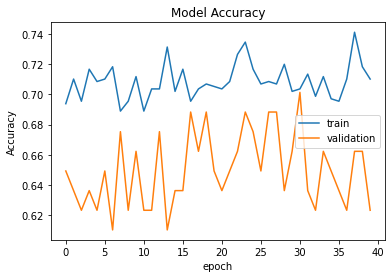

In [33]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='center right')
plt.show()

In [34]:
# Train AND predict on the TRAINING set with k = 1

knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, Y_train)
y_pred = knn_model.predict(X_train)

C:\Users\aishw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
#Evaluate training set accuracy
accuracy_score(Y_train,y_pred)

1.0

In [36]:
#Evaluate test set accuracy
y_pred_test = knn_model.predict(X_test)

In [37]:
#Evaluate test set accuracy
accuracy_score(Y_test,y_pred_test)

0.6883116883116883

In [38]:
# Train AND predict on the TRAINING set with k = 5
knn_model_I = KNeighborsClassifier(n_neighbors = 5)
knn_model_I.fit(X_train, Y_train)
y_pred = knn_model_I.predict(X_train)
accuracy_score(Y_train,y_pred)

C:\Users\aishw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7866449511400652

In [39]:
#Evaluate test set accuracy with the same model,i .e. K = 5 model
y_pred_test = knn_model_I.predict(X_test)
accuracy_score(Y_test,y_pred_test)

0.7142857142857143

In [40]:
# Train AND predict on the TRAINING set with k = 3
knn_model_III = KNeighborsClassifier(n_neighbors = 3)
knn_model_III.fit(X_train, Y_train)
y_pred = knn_model_III.predict(X_train)
accuracy_score(Y_train,y_pred)

C:\Users\aishw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8371335504885994

In [41]:
#Evaluate test set accuracy with the same model, i.e, k = 3 model
y_pred_test = knn_model_III.predict(X_test)
accuracy_score(Y_test,y_pred_test)

0.7142857142857143

# CONFUSION MATRIX, RECALL, AND PRECISON

In [42]:
'''Make a confusion matrix for the K = 3 model based test set predictions.
Make a pandas dataframe out of it so that we can use seaborn to 
plot it easily'''

c_mat = confusion_matrix(Y_test,y_pred_test)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.head(2)

,0,1
0,47,11
1,11,8


In [43]:
'''Rename indices and columns, and transpose the dataframe so that
actual items are plotted on the x-axis, and predicted on the y-axis'''

c_mat_df.columns = ["Did not Survive","Survived"]
c_mat_df.index = ["Did not Survive","Survived"]
c_mat_df = c_mat_df.T
c_mat_df

,Did not Survive,Survived
Did not Survive,47,11
Survived,11,8


Text(50.99999999999999, 0.5, 'Predicted')

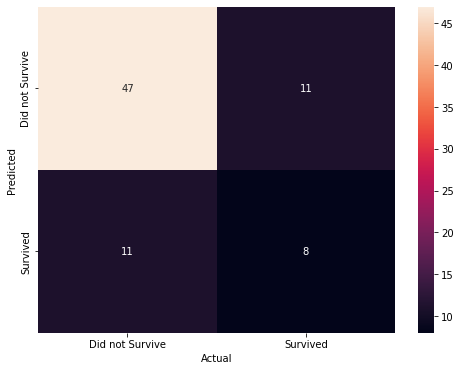

In [44]:
# Make a heatmap of the confusion matrix with seaborn

plt.figure(figsize = (8,6))
sns.heatmap(c_mat_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [46]:
# true positives (top left)
tp = 47
#true negatives (bottom right)
tn = 8
#false positives (top right)
fp = 11
#false negatives (bottom left)
fn = 11

In [47]:
# Recall (Sensitivity) = tp/tp+fn, Precision = tp/tp+fp

recall = 35/(35+10)
precision = 35/(35+12)
print(recall,precision)

0.7777777777777778 0.7446808510638298


In [48]:
#F1 score = 2*(precision * recall)/precision + recall

f_score = (2*recall*precision)/(recall+precision)
f_score

0.7608695652173912

In [49]:
# Or you can use the built in scikit-learn function to do this at one go!

scores = classification_report(Y_test,y_pred_test)
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        58
           1       0.42      0.42      0.42        19

    accuracy                           0.71        77
   macro avg       0.62      0.62      0.62        77
weighted avg       0.71      0.71      0.71        77



# ROC / AUC CURVE

In [50]:
rec, fall_out, thresholds = roc_curve(Y_test,y_pred_test)

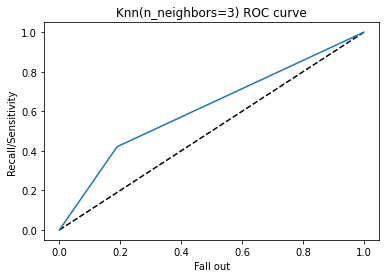

In [51]:
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()


In [52]:
#Area under ROC curve
roc_auc_score(Y_test,y_pred_test)

0.6156987295825771